In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
X = df.drop(['CustomerID','Genre'],axis=1)

In [4]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

In [5]:

for k in range(1,10): 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)           
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [13]:
y=[]
x=[]
for key,val in mapping2.items():
    y.append(val)
    x.append(key)
    print(str(key)+' : '+str(val))
y

1 : 308812.78
2 : 212840.169821
3 : 143342.751572
4 : 104374.159851
5 : 75350.7791725
6 : 58302.4063086
7 : 51082.5429679
8 : 44640.0280485
9 : 40915.7928169


[308812.78000000003,
 212840.16982097185,
 143342.751571706,
 104374.1598511286,
 75350.779172487761,
 58302.406308603677,
 51082.54296792137,
 44640.02804853041,
 40915.792816931571]

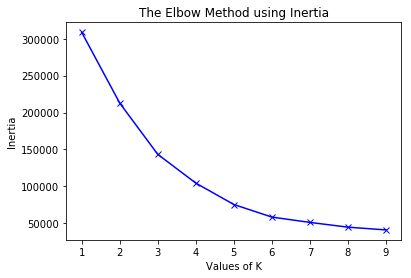

In [10]:
K = range(1,10)
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 


In [14]:
d=[]
for i in range(y.__len__()-1):
    d.append((y[i]-y[i+1])/(x[i]-x[i+1]))
d

[-95972.610179028183,
 -69497.418249265844,
 -38968.591720577402,
 -29023.380678640839,
 -17048.372863884084,
 -7219.8633406823064,
 -6442.5149193909601,
 -3724.2352315988392]

In [15]:
from kneed import KneeLocator
kn = KneeLocator(K, y, curve='convex', direction='decreasing')
print(kn.knee)

ModuleNotFoundError: No module named 'kneed'